# Weather Map

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "~/desktop/creativity/data_analytics/git/weather_api/data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

### Generate Cities

In [25]:
 # List for holding latitudes, longitudes, and cities
lat_lngs = []
cities = []

# Set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

In [26]:
# Print city count and set as a variable
citiesCount = len(cities)
print(citiesCount)

647


In [27]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
queryUrl = f"{url}appid={weather_api_key}&units={units}&q="


### Api Calls

In [79]:
#Lists
name = []
temp = []
humid = []
wind = []
cloud = []
lat = []

recordCount = 0
setCount = 1

# Looping through the list of cities and performing a request for data on each
for city in cities:
    try:
        response = requests.get(queryUrl + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        name.append(response['name'])
        if recordCount > 49:
            recordCount = 1
            setCount += 1
            name.append(city)
            print(f'Found record {recordCount} of set {setCount} | {name}')
        else:
            countOne += 1
            name.append(city)
    except:
            print("City's record not found.")

    if cities.index(city)% 60 == 0:
        time.sleep(2)
# printing a summary of the collected data
print(f"The latitude information received is: {lat}\n")
print(f"The temperature information received is: {temp}\n")
print(f"The humidity information received is: {humid}\n")
print(f"The windspeed information received is: {wind}\n")
print(f"The cloudiness information received is: {cloud}\n")
print("__________________________\n Retreival Complete\n__________________________")

City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.


City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.
City's record not found.


### Create CSV

In [62]:
# Creating dataframe
weatherData = {
    "City": name,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity (%)": humid,
    "Windspeed (mph)": wind,
    "Cloudiness (%)": cloud,
}
weatherData_df=pd.DataFrame(weatherData)

# Creating CSV in designated folder, and display dataframe
weatherData_df.to_csv(output_data_file)
weatherData_df

,City,Latitude,Temperature (F),Humidity (%),Windspeed (mph),Cloudiness (%)
0,Morondava,-20.2833,75.70,77,8.39,0
1,Atuona,-9.8000,79.48,75,17.74,63
2,Mar del Plata,-38.0023,64.17,45,10.36,0
3,Jamestown,42.0970,62.13,29,9.22,20
4,Laguna,38.4210,67.30,59,10.36,1
...,...,...,...,...,...,...
586,Santa Helena de Goiás,-17.8136,86.07,30,2.53,35
587,Krasnogorsk,55.8225,60.75,88,8.95,0
588,Bétaré Oya,5.6000,72.37,87,2.30,100
589,Nouakchott,18.0858,80.60,50,23.02,6


In [63]:
weatherData_df.count()

City               591
Latitude           591
Temperature (F)    591
Humidity (%)       591
Windspeed (mph)    591
Cloudiness (%)     591
dtype: int64

### Create Scatter Plots

#### Temperature (F) vs. Latitude

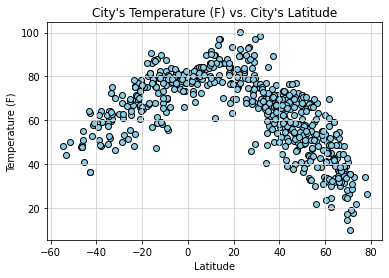

In [65]:
# Creating plot
plt.scatter(weatherData_df["Latitude"],weatherData_df["Temperature (F)"],edgecolors="black",facecolors="skyblue")
# Adding style to chart
plt.title("City's Temperature (F) vs. City's Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("data/figures/temp_vs_lat.png")
plt.show()


Scatter plot showing the relationship between a city's latitude and it's maximum temperature. There is a peak at about 15 degrees latitude, with a correlation between temperature and location at latitudes above and below that marker.

#### Humidity (%) vs. Latitude

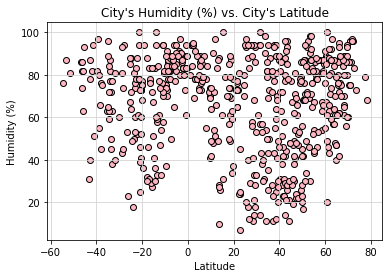

In [66]:
# Creating plot
plt.scatter(weatherData_df["Latitude"],weatherData_df["Humidity (%)"],edgecolors="black",facecolors="lightpink")
# Adding style to chart
plt.title("City's Humidity (%) vs. City's Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("data/figures/humid_vs_lat.png")
plt.show()

Scatter plot showing the relationship between a city's latitude and it's maximum humidity. There does not seem to be any correlation between a city's latitude and it's level of humidity, however, the values do visually show a majority of cities have a max humidity level above 50%.

#### Cloudiness (%) vs. Latitude

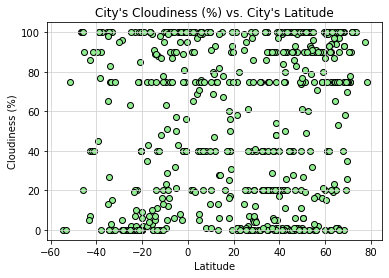

In [67]:
# Creating plot
plt.scatter(weatherData_df["Latitude"],weatherData_df["Cloudiness (%)"],edgecolors="black",facecolors="lightgreen")
# Adding style to chart
plt.title("City's Cloudiness (%) vs. City's Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("data/figures/cloud_vs_lat.png")
plt.show()

Scatter plot showing the relationship between a city's latitude and it's level of cloudiness. There is a noticable amount of clustering at 0% cloudiness, 20% cloudiness, 40% cloudiness, roughly 75% cloudiness, and 100% cloudiness, and there appears to be some manner of an alternating pattern with a majority of those clusters changing between 0% cloudiness and 100% cloudiness as the latitude increases. It is possible there is a relationship hidden deeper within the data that could be found with more thorough details.

#### Wind Speed (mph) vs. Latitude

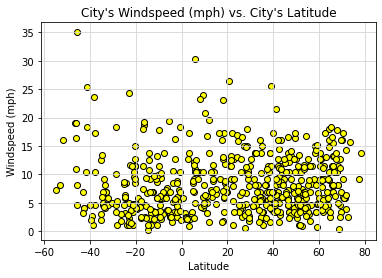

In [68]:
# Creating plot
plt.scatter(weatherData_df["Latitude"],weatherData_df["Windspeed (mph)"],edgecolors="black",facecolors="yellow")
# Adding style to chart
plt.title("City's Windspeed (mph) vs. City's Latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("data/figures/wind_vs_lat.png")
plt.show()

Scatter plot showing the relationship between a city's latitude and it's max windspeed. The vast majority of cities are in the range of 0 mph to 15 mph, with seemingly no relation to the city's latitude.

### Linear Regression

In [69]:
# set dataframe, x column, and y column 
def makeLinRegression(df, x_Col, y_Col):
    # setup linear regression frame
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
                                                           df[y_Col])
    # setup linear regression data points frame
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    # setup scatter plot frame
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
                      title="{} vs. {} Linear Regression".format(y_Col, x_Col))
    # add red best fit line
    df_axes.plot(regr_line_x, regr_line_y, 'r')

    # setup output information for best fit line
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                
    return df_axes

In [70]:
# count of all cities for the northern hemisphere
northernHemisphere = weatherData_df.loc[weatherData_df["Latitude"] >= 0]
northernCitiesCount = len(northernHemisphere)
print(f'There are {northernCitiesCount} cities in the northern hemisphere out of {citiesCount} cities total.')

# count of all cities for the southern hemisphere
southernHemisphere = weatherData_df.loc[weatherData_df["Latitude"] < 0]
southernCitiesCount = len(southernHemisphere)
print(f'There are {southernCitiesCount} cities in the southern hemisphere out of {citiesCount} cities total.')

# Need to drop the 56 cities whose weather data could not be found, because they are throwing off the total cities count.

There are 406 cities in the northern hemisphere out of 647 cities total.
There are 185 cities in the southern hemisphere out of 647 cities total.


The equation of the best-fit linear regression line for this chart is y=-0.79x+93.42
The r-squared correlation coefficient for this line is -0.83


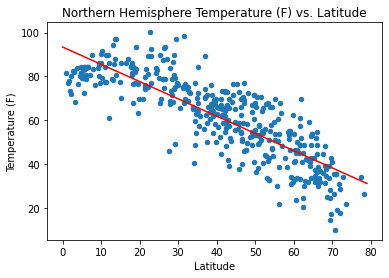

In [71]:
(northernTemp_slope, northernTemp_intercept, n_temp_r_val, _, _) = linregress(northernHemisphere["Latitude"], 
                                                           northernHemisphere["Temperature (F)"])

regr_line_x = np.array([a for a in range(80)])
regr_line_y = (northernTemp_slope * regr_line_x + northernTemp_intercept)
northernTemp_axes = northernHemisphere.plot(kind="scatter", x="Latitude", 
                                       y="Temperature (F)", 
                                       title="Northern Hemisphere Temperature (F) vs. Latitude")
                        

northernTemp_axes.plot(regr_line_x, regr_line_y, 'r')

print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
      .format(n_temp_slope, n_temp_intercept))
print("The r-squared correlation coefficient for this line is {:.2f}".format(n_temp_r_val))
northernTemp_axes.get_figure().savefig("data/figures/temp_vs_lat_northern.png")

The scatter plot for the northern hemisphere's temperature vs. latitude. The max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere

The equation of the best-fit linear regression line for this chart is y=0.64x+81.90
The r-squared correlation coefficient for this line is 0.74


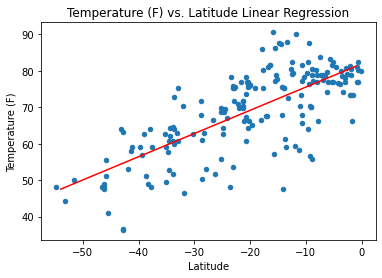

In [72]:
southernTemp_axes = makeLinRegression(southernHemisphere, "Latitude", "Temperature (F)")
southernTemp_axes.get_figure().savefig("data/figures/temp_vs_lat_southern.png")

The scatter plot for the southern hemisphere's temperature vs. latitude. The max temperature appears show a strong positive linear relationship with latitudes in the southern hemisphere.

The equation of the best-fit linear regression line for this chart is y=0.07x+62.21
The r-squared correlation coefficient for this line is 0.06


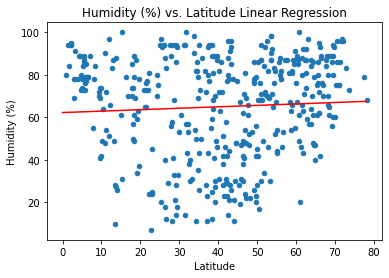

In [73]:
northernHumid_axes = makeLinRegression(northernHemisphere, "Latitude", "Humidity (%)")
northernHumid_axes.get_figure().savefig("data/figures/humid_vs_lat_northern.png")

The scatter plot for the northern hemisphere's humidity vs. latitude.

The equation of the best-fit linear regression line for this chart is y=0.21x+75.63
The r-squared correlation coefficient for this line is 0.15


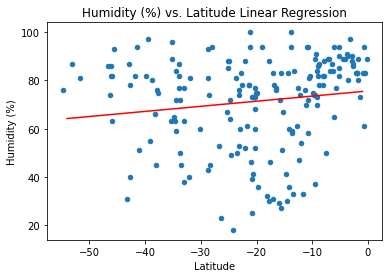

In [74]:
southernHumid_axes = makeLinRegression(southernHemisphere, "Latitude", "Humidity (%)")
southernHumid_axes.get_figure().savefig("data/figures/humid_vs_lat_southern.png")

The scatter plot for the southern hemisphere's humidity vs. latitude.

The equation of the best-fit linear regression line for this chart is y=0.30x+43.00
The r-squared correlation coefficient for this line is 0.15


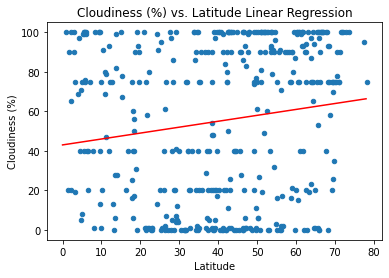

In [75]:
northernCloud_axes = makeLinRegression(northernHemisphere, "Latitude", "Cloudiness (%)")
northernCloud_axes.get_figure().savefig("data/figures/cloud_vs_lat_northern.png")

The scatter plot for the northern hemisphere's cloudiness vs. latitude.

The equation of the best-fit linear regression line for this chart is y=0.32x+55.56
The r-squared correlation coefficient for this line is 0.10


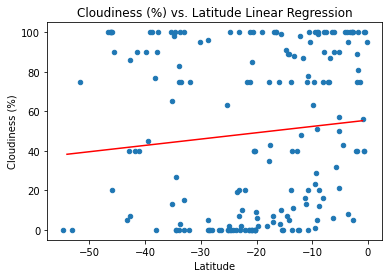

In [76]:
southernCloud_axes = makeLinRegression(southernHemisphere, "Latitude", "Cloudiness (%)")
southernCloud_axes.get_figure().savefig("data/figures/cloud_vs_lat_southern.png")

The scatter plot for the southern hemisphere's cloudiness vs. latitude.

The equation of the best-fit linear regression line for this chart is y=-0.00x+8.59
The r-squared correlation coefficient for this line is -0.02


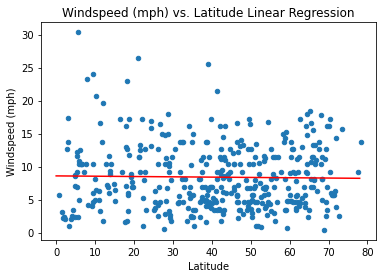

In [77]:
northernWind_axes = makeLinRegression(northernHemisphere, "Latitude", "Windspeed (mph)")
northernWind_axes.get_figure().savefig("data/figures/wind_vs_lat_northern.png")

The scatter plot for the northern hemisphere's windspeed vs. latitude.

The equation of the best-fit linear regression line for this chart is y=-0.08x+5.68
The r-squared correlation coefficient for this line is -0.20


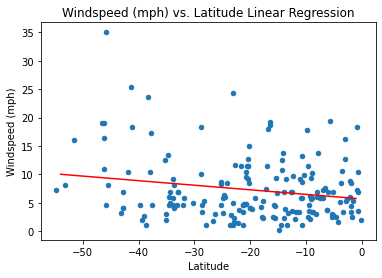

In [78]:
southernWind_axes=makeLinRegression(southernHemisphere, "Latitude", "Windspeed (mph)")
southernWind_axes.get_figure().savefig("data/figures/wind_vs_lat_southern.png")

The scatter plot for the southern hemisphere's windspeed vs. latitude.